<a href="https://colab.research.google.com/github/swat90/OIBSIP/blob/main/iris1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IRIS flower classification**

Task objective - Use ML models to identify IRIS flower type

Import all the necessary libraries

In [ ]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from feature_engine.outliers import Winsorizer

from warnings import filterwarnings
filterwarnings(action='ignore')

Load the iris dataset from sklearn library

In [ ]:
iris = load_iris()
# Create a DataFrame from the Iris dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.info()
# we have five columns, sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)  and target with each having 150 entries.
#First 4 columns have float data type and the last column is integer
iris_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


First and second moment business decision

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Data Preprocessing

In [ ]:
#Check for duplicates
duplicates_count = iris_df.duplicated().sum()
print(duplicates_count) #1
iris_df = iris_df.drop_duplicates()

1


In [ ]:
#Check for missing values
iris_df.isnull().sum() #no missing values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Univariate Analysis

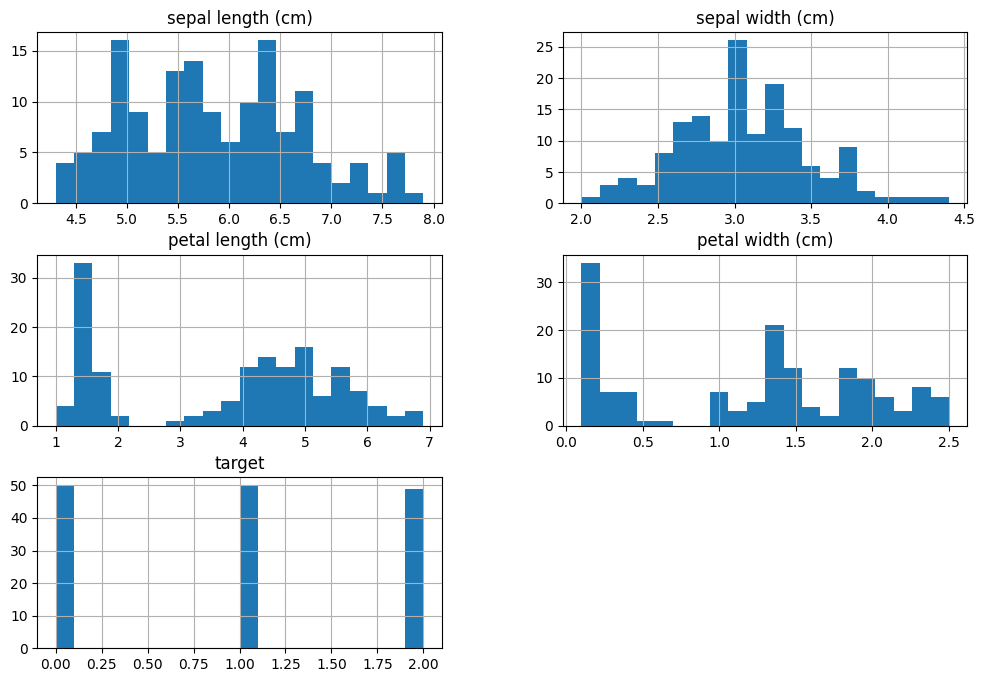

In [ ]:
# Create a histogram for the features
iris_df.hist(bins=20, figsize=(12, 8))
plt.show()
#petal length and petal width has bimode distribution

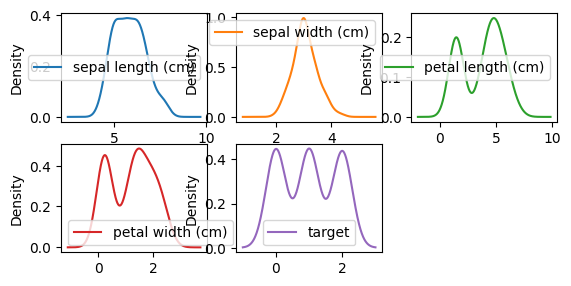

In [ ]:
iris_df.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)
plt.show()
#sepal length has flat peak, Platykurtic distribution, fewer extreme values (outliers) than a normal distribution.
#sepal width has sharp peak, Leptokurtic distribution, more extreme values (outliers) than a normal distribution.

In [ ]:
print("Skewness\n", iris_df.skew())
print("Kurtosis\n", iris_df.kurt())

Skewness
 sepal length (cm)    0.312826
sepal width (cm)     0.307149
petal length (cm)   -0.263101
petal width (cm)    -0.090076
target               0.012434
dtype: float64
Kurtosis
 sepal length (cm)   -0.569006
sepal width (cm)     0.226236
petal length (cm)   -1.408270
petal width (cm)    -1.339953
target              -1.504770
dtype: float64


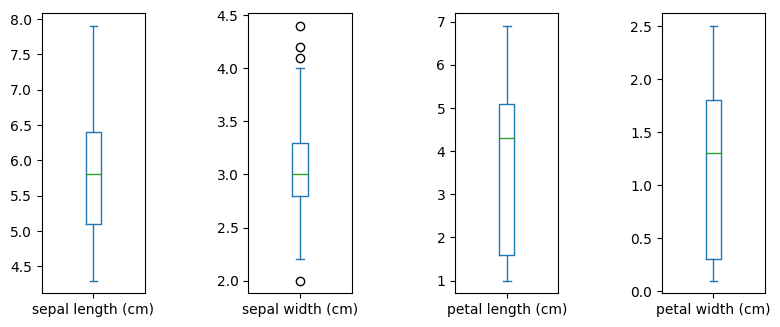

In [ ]:
iris_df.iloc[:, :4].plot(kind ='box', subplots = True, layout =(2,5), sharex = False, sharey = False, figsize=(12, 8))
# Add space between subplots horizontally
plt.subplots_adjust(wspace=1)
plt.show()
#sepal width has outliers which is also predicted from our density distribution plots

Remove outliers

In [ ]:
winsorizer = Winsorizer(capping_method="iqr", tail="both", fold=1.5, variables=['sepal width (cm)'])

# Fit and transform the Winsorizer on the dataset
iris_transformed = winsorizer.fit_transform(iris_df)

# Display the first few rows of the transformed dataset
print(iris_transformed.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


Bivariate analysis

Paiplot to see the correlations

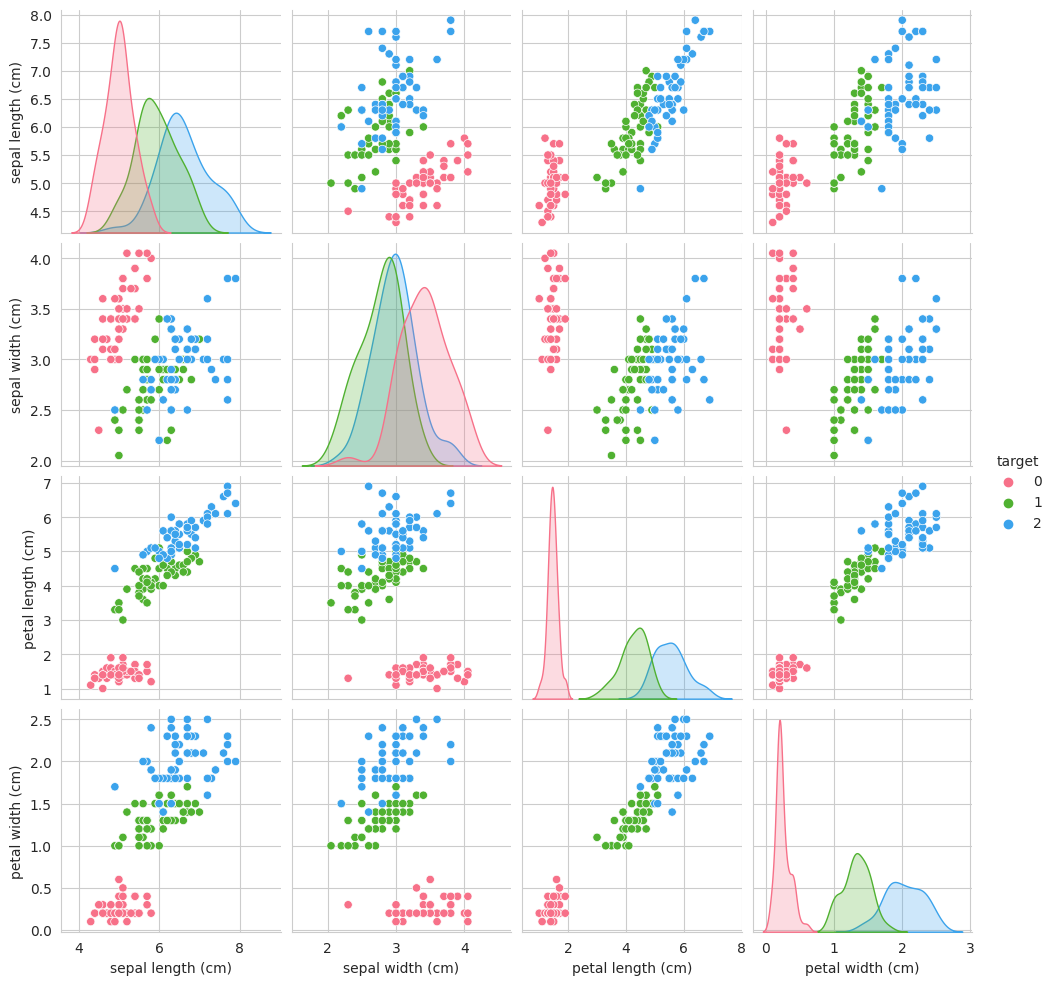

In [ ]:
# Define a custom color palette with distinct colors
custom_palette = sns.color_palette("husl", 3)

sns.pairplot(iris_transformed,hue='target', palette=custom_palette)
plt.show()
#Target 1 and 2 show more similar behavior than target 0.
#petal length shows strong positive correlation with sepal length and petal width for target 1 and 2

Correlation matrix

<Axes: >

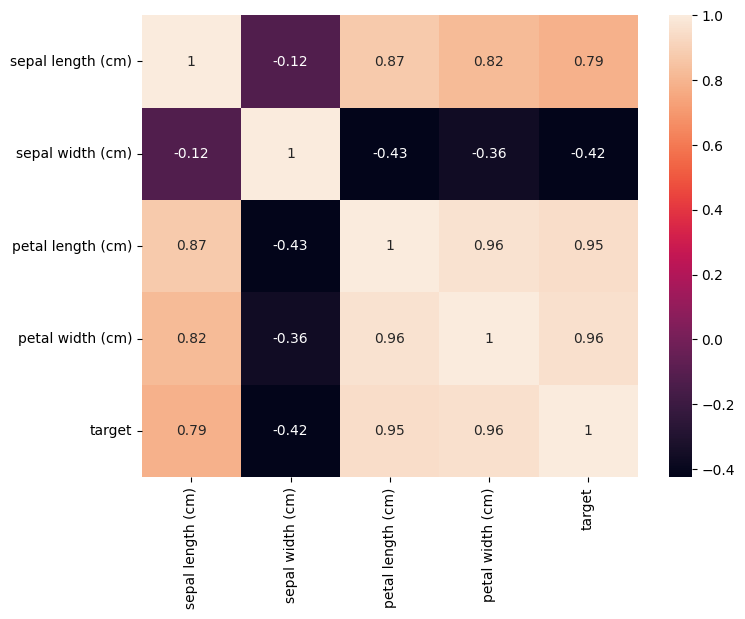

In [ ]:
corr = iris_transformed.corr()
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(corr, annot = True, ax = ax)
#as discussed above, petal length shows strong positive correlation with sepal length and petal width.

Model Building

Install necessary libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

Split into train and test

In [ ]:
X = iris_transformed.drop(columns = ["target"])
y = iris_transformed['target']
X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size = 0.30)

Logistic regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
Accuracy_LogisticRegression = metrics.accuracy_score(prediction, y_test)

print('Accuracy_LG:', Accuracy_LogisticRegression)

Accuracy_LG: 0.9555555555555556


In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_test,prediction)
print("Confusion matrix: \n", confusion)
print(metrics.classification_report(y_test,prediction))
#the error is in prediction of Target 2 which is predicted as Traget 1

Confusion matrix: 
 [[16  0  0]
 [ 0 15  0]
 [ 0  2 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      1.00      0.94        15
           2       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



K-nearest neighbors

In [ ]:
model_1 = KNeighborsClassifier(n_neighbors=5)
model_1.fit(X_train, y_train)

y_pred1 = model_1.predict(X_test)
Accuracy_KNN = metrics.accuracy_score(y_test, y_pred1)

print("Accuracy_KNN:", Accuracy_KNN)

Accuracy_KNN: 0.9777777777777777


Support Vector

In [ ]:
model_2 = SVC()
model_2.fit(X_train, y_train)

y_pred2 = model_2.predict(X_test)
Accuracy_SVC = metrics.accuracy_score(y_test, y_pred2)

print("Accuracy_SVC=", Accuracy_SVC)

Accuracy_SVC= 0.9777777777777777


Decision Tree

In [ ]:
model_3 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model_3.fit(X_train, y_train)

y_pred3 = model_3.predict(X_test)
Accuracy_decisionTree = metrics.accuracy_score(y_test, y_pred3)

print("Accuracy_decisionT=", Accuracy_decisionTree)

Accuracy_decisionT= 0.9555555555555556


Compare all the results

In [ ]:
print('Accuracy_LogisticRegression:', Accuracy_LogisticRegression, "Accuracy_KNN:", Accuracy_KNN, "Accuracy_SVC=", Accuracy_SVC, "Accuracy_decisionT=", Accuracy_decisionTree, )

Accuracy_LogisticRegression: 0.9555555555555556 Accuracy_KNN: 0.9777777777777777 Accuracy_SVC= 0.9777777777777777 Accuracy_decisionT= 0.9555555555555556


After evaluating multiple models, K-Nearest Neighbors (KNN) and Support Vector Classification (SVC) emerged with the highest accuracy in predicting the flower types. Considering the simplicity of KNN, we opt to use it as our chosen model.

In [ ]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred1)
print("Confusion matrix: \n", confusion)
print(metrics.classification_report(y_test, y_pred1))
#with KNN, one data is wrongly classified.

Confusion matrix: 
 [[16  0  0]
 [ 0 15  0]
 [ 0  1 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

